In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

#### Let's read the CSV file into a dataframe

In [2]:
column_header = pd.read_csv('Cols.csv') # Extract Column Info
data_tech = pd.read_csv('Tech.csv') # Extract Data

#### We start off by observing the overall shape of the dataframe

In [3]:
data_tech.shape

(1259, 27)

#### Let's also observe what each column corresponds to

In [4]:
column_header

,Column,Description
0,Timestamp,Time
1,Age,Age
2,Gender,Gender
3,Country,Country
4,state,"If you live in the United States, which state ..."
5,self_employed,Are you self-employed?
6,family_history,Do you have a family history of mental illness?
7,treatment,Have you sought treatment for a mental health ...
8,work_interfere,"If you have a mental health condition, do you ..."
9,no_employees,How many employees does your company or organi...


#### Lets peek into the actual records that the table holds.

In [5]:
data_tech.sample(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
272,2014-08-27 13:56:35,30,Male,United States,NJ,No,No,No,NaN,More than 1000,...,Very easy,No,No,Some of them,Yes,No,No,Yes,No,NaN
731,2014-08-28 10:30:04,24,Male,France,NaN,No,No,No,NaN,26-100,...,Don't know,Maybe,No,Yes,Some of them,No,No,Don't know,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
765,2014-08-28 11:48:12,39,Male,Netherlands,NaN,Yes,No,No,NaN,6-25,...,Somewhat easy,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
789,2014-08-28 12:44:55,39,m,Switzerland,NaN,No,No,Yes,Never,More than 1000,...,Somewhat easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN


#### Time for a quick overview of the nature of data in each column

In [6]:
data_tech.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Data Cleaning

## Dropping Unnecessary Columns

#### Survey timestamp is meaningless for our EDA

In [7]:
data_tech = data_tech.drop(['Timestamp'], axis=1)

#### Comments and state were optional and are not required in the EDA either

In [8]:
data_tech = data_tech.drop(['state', 'comments'], axis=1)

## Eliminating Non-Tech Survey Responses

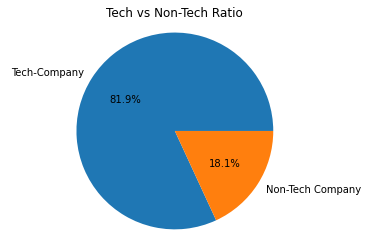

In [9]:
Yes = data_tech['tech_company'].value_counts()[0]
No = data_tech['tech_company'].value_counts()[1]
List = [Yes, No]
Labels = ['Tech-Company', 'Non-Tech Company']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Tech vs Non-Tech Ratio')
plt.axis('equal')
plt.show()

#### Since our research focuses on Mental Health Awareness in Tech-Firms, we separate out the data which is non-tech.

In [10]:
non_tech = data_tech[data_tech['tech_company'] == "No"]
data_tech = data_tech[data_tech['tech_company'] == "Yes"]
print("Values in Dataset corresponding to Tech Company:", data_tech['tech_company'].value_counts())

Values in Dataset corresponding to Tech Company: Yes    1031
Name: tech_company, dtype: int64


## Eliminating NA Values

In [11]:
print("Number of NA values in Self Employed Column: ", data_tech['self_employed'].isna().sum())

Number of NA values in Self Employed Column:  16


#### The count of values with NA in self_employed is small so we remove the entire records to maintain authenticity

In [12]:
data_tech = data_tech[data_tech['self_employed'].notna()]

In [13]:
print("Number of NA values in Self Employed Column: ", data_tech['self_employed'].isna().sum())

Number of NA values in Self Employed Column:  0


## Dealing With Outliers

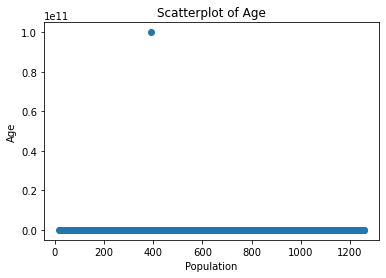

Max value:  99999999999
Min value:  -1


In [14]:
plt.scatter(data_tech.index, data_tech['Age'])
plt.title("Scatterplot of Age")
plt.xlabel("Population")
plt.ylabel("Age")
plt.show()

print("Max value: ", data_tech["Age"].max())
print("Min value: ", data_tech["Age"].min())

#### As we can see, outliers in the Age column are evident through the Scatterplot. Therefore, we need to remove the outliers. We can do so by setting a check which accepts ages within a range and sets all other to NAN.

In [15]:
def age_check(age):
    if age>=0 and age<=100:
        return age
    else:
        return np.nan
data_tech['Cleaned_age'] = data_tech['Age'].apply(age_check)

#print(data_tech["Cleaned_age"].value_counts().sort_index(0))

print("Max value: ", data_tech["Cleaned_age"].max())
print("Min value: ", data_tech["Cleaned_age"].min())
print("NaN values: ", pd.isnull(data_tech['Cleaned_age']).sum())


Max value:  62.0
Min value:  5.0
NaN values:  3


#### Age now appears to be within a particular range. However, it has come at the cost of the 5 NAN values.
Let us visualize them using the same Scatterplot we created before.

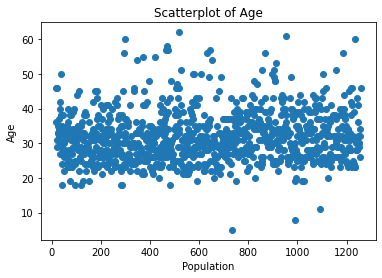

In [16]:
plt.scatter(data_tech.index, data_tech['Cleaned_age'])
plt.title("Scatterplot of Age")
plt.xlabel("Population")
plt.ylabel("Age")
plt.show()

Finally, we get some more insight into the Age attribute

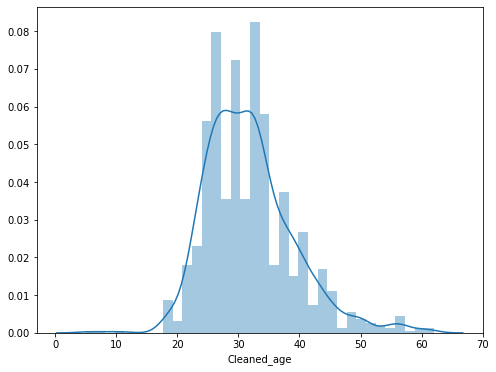

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(data_tech["Cleaned_age"].dropna(), ax=ax);

In [18]:
print("Mean Age: ", data_tech['Cleaned_age'].mean())
print("Standar Deviation: ", data_tech['Cleaned_age'].std())

Mean Age:  31.807312252964426
Standar Deviation:  7.286793189359677


#### Now to cater for the NAN values, we can fill them using the mean of the Age.

In [19]:
data_tech['Cleaned_age'] = data_tech['Cleaned_age'].fillna(data_tech['Cleaned_age'].mean())
print("NaN values: ", pd.isnull(data_tech['Cleaned_age']).sum())
data_tech['Cleaned_age'] = data_tech['Cleaned_age'].astype('int') 
data_tech = data_tech.drop(['Age'], axis=1)
data_tech = data_tech.rename(columns={"Cleaned_age": "Age"})

NaN values:  0


#### Lets peek into the data again. This time the first five records

In [20]:
data_tech.head(5)

,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age
18,male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,46
19,Male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,No,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,36
20,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,Yes,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,29
21,male,United States,Yes,No,No,Never,1-5,Yes,Yes,No,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,31
22,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,46


## Standardizing Columns

### Cleaning Gender Column

In [21]:
print("Count of distinct responses for Gender:", len(set(data_tech['Gender'])))
print(data_tech['Gender'].unique())

Count of distinct responses for Gender: 42
['male' 'Male' 'Female' 'female' 'M' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'Mal'
 'Male (CIS)' 'f' 'queer/she/they' 'non-binary' 'Femake' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'male leaning androgynous' 'Male ' 'Man' 'msle' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p'
 'Cis Man']


#### We categorize each entry into three unique columns for gender would be Male, Female, Other

In [22]:
data_tech['Gender'] = data_tech['Gender'].replace(['Cis Man','Cis Male','cis male','Male','male','m','M','Male ','Make','Mal','Malr', 'Mail','msle','Man','maile', 'Male (CIS)', 'Male-ish'], 'Male')
data_tech['Gender'] = data_tech['Gender'].replace(["Trans-female",  "Trans woman", "Female (trans)",'Female ','Cis Female','Female (cis)','woman','femail','Female','female','F','f','Woman', 'Female','Femake','cis-female/femme'], 'Female')
data_tech['Gender'] = data_tech['Gender'].replace(["non-binary", "Nah", "All", "Enby", "fluid", "Genderqueer", "Androgyne", "Agender", "male leaning androgynous", "Guy (-ish) ^_^", "Neuter", "queer", "ostensibly male, unsure what that really means", "queer/she/they", "something kinda male?"], 'Other')
data_tech.drop(data_tech[data_tech['Gender'] == 'p'].index, inplace=True)
data_tech.drop(data_tech[data_tech['Gender'] == 'A little about you'].index, inplace=True)
print(data_tech['Gender'].value_counts())

Male      815
Female    186
Other      12
Name: Gender, dtype: int64


#### Now that the gender column is cleaned up, lets visualize the count of 3 distinct values

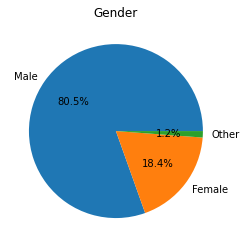

In [23]:
ax = data_tech['Gender'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('Gender')
plt.ylabel('')
plt.show()

### Converting column names to lowercase and adjusting column indexes

In [24]:
data_tech.columns = map(str.lower, data_tech.columns)
data_tech = data_tech[['age','gender', 'country', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']]
data_tech = data_tech.reset_index().drop(columns=['index'])

In [25]:
data_tech.head(5)

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,46,Male,United States,Yes,Yes,No,Sometimes,1-5,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
1,36,Male,France,Yes,Yes,No,NaN,6-25,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
2,29,Male,United States,No,Yes,Yes,Sometimes,100-500,No,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
3,31,Male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
4,46,Male,United States,No,No,Yes,Often,26-100,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


#### Let's have a look where we are now in terms of NAN values

In [26]:
data_tech.isna().sum()

age                            0
gender                         0
country                        0
self_employed                  0
family_history                 0
treatment                      0
work_interfere               216
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

#### work_interfere seems to have many NA values.

In [27]:
print("NA values in work_interfere:",data_tech['work_interfere'].isna().sum())

NA values in work_interfere: 216


 The question corresponding to the column work_interfere was structured as "If you have a mental health condition, do you feel that it interferes with your work?" This may imply that the NA values hint that the respective employees had no experience related to mental issues before so as to comment upon this question.

### How many people face or have faced mental health issues?

In [28]:
data_tech['issue'] = data_tech['work_interfere']

valid = ['Sometimes','Never','Often','Rarely']

for word in valid:
    data_tech.loc[data_tech['work_interfere'] == word,'issue'] = 'Yes'

data_tech.loc[data_tech['issue'] != 'Yes','issue'] = 'No'
 
print(data_tech['issue'].unique())

['Yes' 'No']


### How many people sought treatment for their mental health issues?

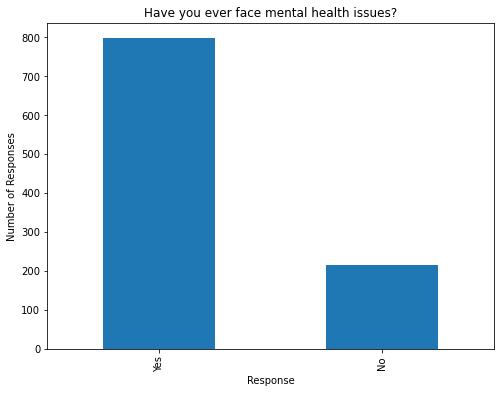

In [29]:
plt.title("Have you ever face mental health issues?")
ax = data_tech['issue'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.show()

#print(data_tech['issue'].value_counts()[0]/data_tech['issue'].value_counts()[1])

### Ratio of people who sought treatment to those who did not

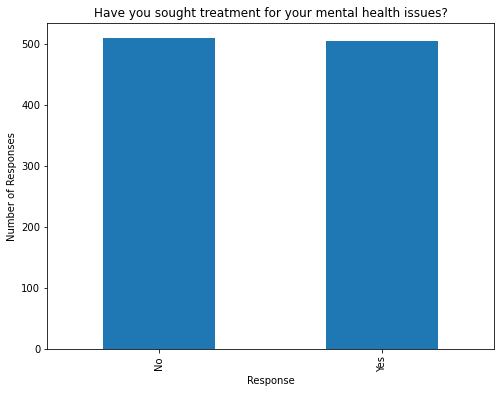

Ratio of people who sought treatment to those who did not  0.9901768172888016 ≈ 1.0


In [30]:
plt.title("Have you sought treatment for your mental health issues?")
ax = data_tech['treatment'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Response")
plt.ylabel("Number of Responses")
plt.show()

yes_count = data_tech['treatment'].value_counts()['Yes']
no_count = data_tech['treatment'].value_counts()['No']

print("Ratio of people who sought treatment to those who did not ", yes_count/no_count, "≈", round(yes_count/no_count))

## Does the nature of work affect the way people face and deal with their mental health?

Lets see how the nature of work affects the way employees respond to mental health issues. We divide this into three catgeories

- Self-Employment

- Remote-work

- Organization Size

We will analyze their impacts on the mental health of employees and the way they respond to it step by step

### Self-Employment

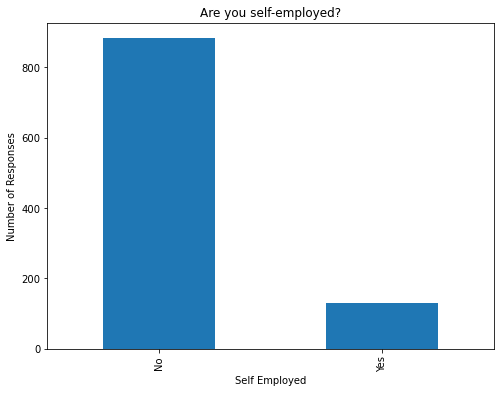

Not self-employed:  883
Self-employed:  130
Not self-employed : Self-employed ≈  7.0


In [31]:
plt.title("Are you self-employed?")
ax = data_tech['self_employed'].value_counts()
ax.plot.bar(figsize=(8,6))#pie(autopct="%.1f%%")
plt.xlabel("Self Employed")
plt.ylabel("Number of Responses")
plt.show()

no = data_tech['self_employed'].value_counts()[0]
yes = data_tech['self_employed'].value_counts()[1]

print("Not self-employed: ", no)
print("Self-employed: ", yes)
print("Not self-employed : Self-employed ≈ ",round(no/yes))

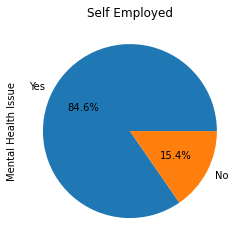

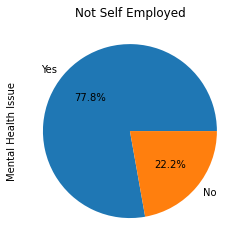

In [32]:
Label = ['Self Employed','Not Self Employed']
List = ['Yes', 'No']

for inter in range(0,2):
    data = data_tech[(data_tech['self_employed'] == List[inter])]['issue'].value_counts()
    data.plot.pie(subplots=True,autopct="%.1f%%")
    plt.title(Label[inter])
    plt.ylabel('Mental Health Issue')
    plt.show()

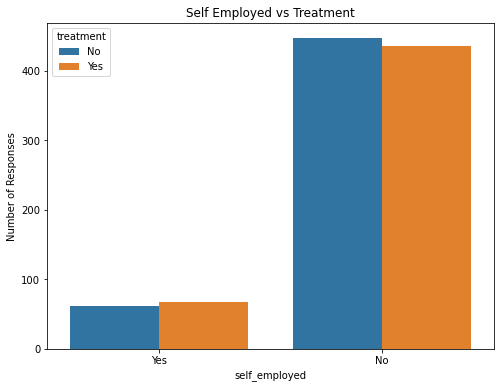

In [33]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'self_employed',ax=ax ,hue= 'treatment')
plt.title('Self Employed vs Treatment')
plt.ylabel("Number of Responses")
plt.show()

Being self employed or not does not affect the prevalence or response to mental health concerns. Both the groups, self-employed or not, are equally likely to face mental health concerns and to seek treatment for them.

### Organization Size

In [34]:
company_sizes = data_tech['no_employees'].unique()
print(company_sizes)

['1-5' '6-25' '100-500' '26-100' '500-1000' 'More than 1000']


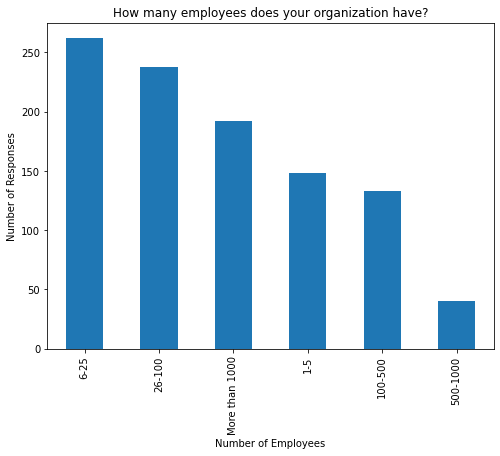

In [35]:
plt.title("How many employees does your organization have?")
ax = data_tech['no_employees'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Number of Employees")
plt.ylabel("Number of Responses")
plt.show()

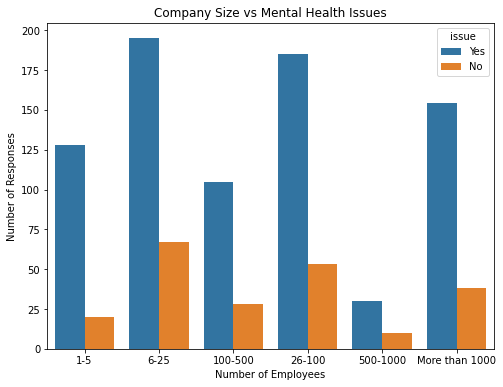

In [36]:
fig, ax = pyplot.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'no_employees',hue= 'issue')
plt.title('Company Size vs Mental Health Issues')
plt.xlabel("Number of Employees")
plt.ylabel("Number of Responses")
plt.show()

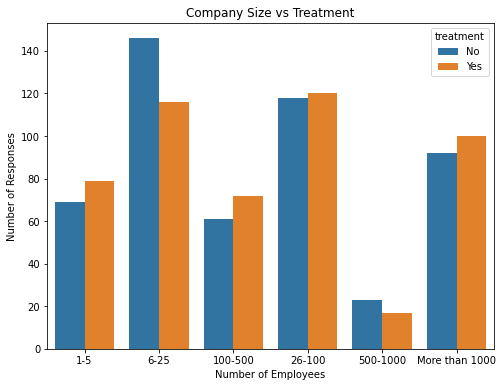

In [37]:
fig, ax = pyplot.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'no_employees',hue= 'treatment')
plt.title('Company Size vs Treatment')
plt.xlabel("Number of Employees")
plt.ylabel("Number of Responses")
plt.show()

### Remote-Work

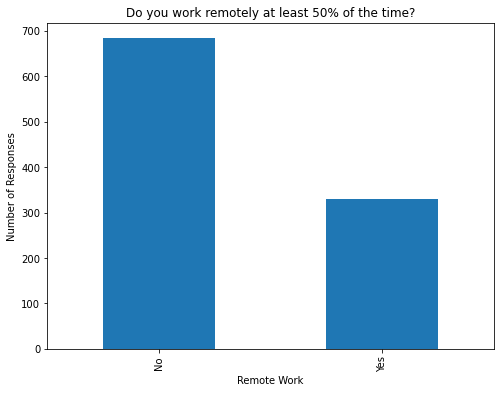

In [38]:
plt.title("Do you work remotely at least 50% of the time?")
ax = data_tech['remote_work'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Remote Work")
plt.ylabel("Number of Responses")
plt.show()

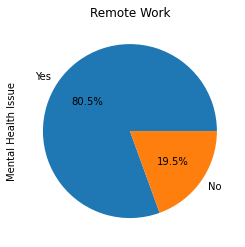

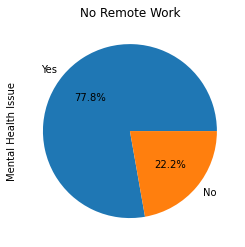

In [39]:
Label = ['Remote Work','No Remote Work']
List = ['Yes', 'No']

for inter in range(0,2):
    data = data_tech[(data_tech['remote_work'] == List[inter])]['issue'].value_counts()
    data.plot.pie(subplots=True,autopct="%.1f%%")
    plt.title(Label[inter])
    plt.ylabel('Mental Health Issue')
    plt.show()

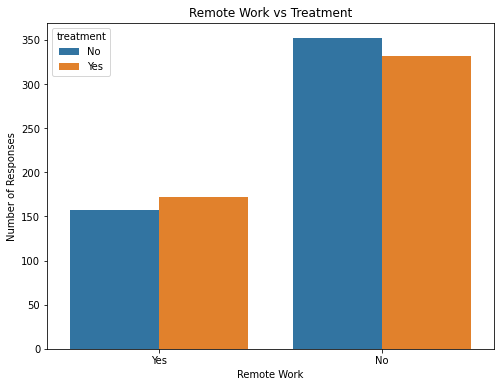

In [40]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'remote_work',ax=ax,hue= 'treatment')
plt.title('Remote Work vs Treatment')
plt.xlabel("Remote Work")
plt.ylabel("Number of Responses")
plt.show()

Therefore, the employee responses indicate that working remotely also has little to no impact on the prevalence of mental health issues in tech-employees and their response (in the form of seeking treatment) to it.

**Conclusion:** The analysis performed on the data hints that the prevalence of mental health issues and the treatment sought in different sizes and natures of organization more or less remains the same. This implies that our further deducations will not be affected by the organizational structure itself but other factors that we'll be looking into 

## Do companies and employees differentiate between the way they deal with mental and physical health?

### Before we derive the inference we will divide the above question into three parts:

- How do employees feel talking to their potential employer about their mental and physical issues and whether they take mental health issues as seriously as physical health issues?

- How do employees think about the negative consequences of sharing their mental and physical health issues with their employers and whether companies take mental health issues as seriously as physical health issues?

- How do employees feel about whether mental health is taken as seriously as physical health by their employer?

### First we will do some data analysis for our first question using the cleaned data set

Q1) How do employees feel talking to their potential employer about their mental and physical issues and whether they take mental health issues as seriously as physical health issues?

In [41]:
mentalCount = (data_tech['mental_health_interview'].value_counts()/len(data_tech))*100
print("Responses regarding mental health issues")
np.round(mentalCount, decimals=1)

Responses regarding mental health issues


No       79.1
Maybe    17.5
Yes       3.5
Name: mental_health_interview, dtype: float64

By looking at the above responses we cannot conclude whether the employers takes mental health as seriously as physical health, because majority of the people are uncertian about the question and they did not Know whether the employer takes mental health issues as serioulsy as physical health issues. One reason why so many people were uncertian could be that majority were uncertian about the health benefits provided by their employer or there was just some lack of awareness about mental health issues.

When questioned whether employees would talk to their potential employers about their mental health issues close to 79.1% of the people responded with a no, only 3.5% of the people stated that they will talk about their mental health issues in an interview and about 17.5% were uncertain of their decision.

In [42]:
physicalCount = (data_tech['phys_health_interview'].value_counts()/len(data_tech))*100
print("Responses regarding physical health issues")
np.round(physicalCount, decimals=1)

Responses regarding physical health issues


Maybe    45.1
No       39.5
Yes      15.4
Name: phys_health_interview, dtype: float64

When questioned whether employees would talk to their potential employers about their physical health issues 39.5% of the people responded with a no, only 15.4% of the people stated that they will talk about their physical health issues in an interview and 41.5% were uncertain of their decision.

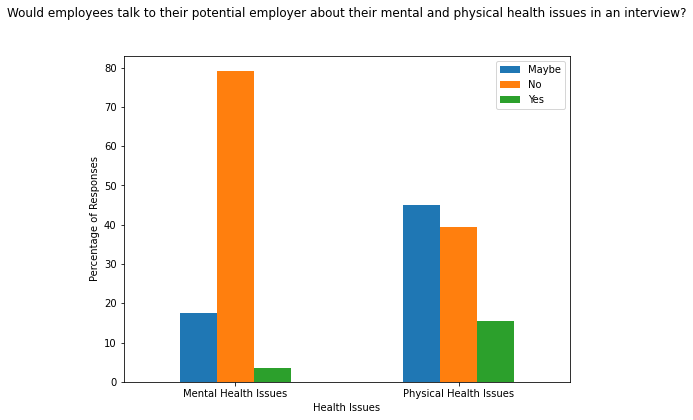

In [43]:
newdf = pd.DataFrame({'Mental Health Issues':mentalCount,'Physical Health Issues':physicalCount}).T
barplot = newdf.plot.bar(rot=0, figsize=(8,6))
barplot.set(ylabel='Percentage of Responses', xlabel='Health Issues')
plt.title('Would employees talk to their potential employer about their mental and physical health issues in an interview?',y=1.1)
plt.show()

Looking at the number of responses and the bar graph above we can conclude about our first question, that employees in genral are not comfortable talking about their mental and physical health issues with an employer in an interview. Despite this we can see that more people are unwilling to share about their mental health issues than talking about their physical healt issues in an interview. This shows that either companies, or employees do not take mental health issues as seriously as physical health issues. One reason for employees not talking openly about their mental health issues could be that they might feel that the employer would not hire them if they talked about their mental health issues, regardless of wether the employee took mental health seriously or not and this reason can be termed as an important confounding factor which can influence our conclusions.

### Now we will move onto our second question

Q2) How do employees think about the negatvie consequences of sharing their mental and physical health issues with their employers and whether companies take mental health issues as seriously as physical health issues?

In [44]:
mentalCount = (data_tech['mental_health_consequence'].value_counts()/len(data_tech))*100
print("Responses regarding mental health issues")
np.round(mentalCount, decimals=1)

Responses regarding mental health issues


No       41.4
Maybe    36.7
Yes      21.9
Name: mental_health_consequence, dtype: float64

When questioned whether sharing about their mental health issues with their employer would have negative consequences or not, 41.4% replied with a no, 21.9% of the people responded that talking about thier mental health issues with their employer would have negative consequences and 36.7% were uncertian about the consequences.

In [45]:
physicalCount = (data_tech['phys_health_consequence'].value_counts()/len(data_tech))*100
print("Responses regarding physical health issues")
np.round(physicalCount, decimals=1)

Responses regarding physical health issues


No       74.7
Maybe    20.5
Yes       4.7
Name: phys_health_consequence, dtype: float64

When questioned whether sharing about their physical health issues with their employer would have negative consequences or not, 74.7% replied with a no, only 4.7% of the people responded that talking about their physical health issues with their employer would have negative consequences and 20.5% of the people were uncertain about the consequences.

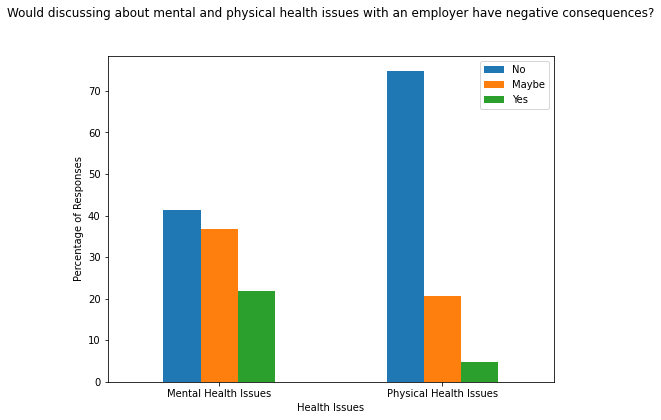

In [46]:
newdf = pd.DataFrame({'Mental Health Issues':mentalCount,'Physical Health Issues':physicalCount}).T
barplot = newdf.plot.bar(rot=0, figsize=(8,6))
barplot.set(ylabel='Percentage of Responses', xlabel='Health Issues')
plt.title('Would discussing about mental and physical health issues with an employer have negative consequences?',y=1.1)
plt.show()

By looking at the number of responses and the bar graph above we can conclude that even though majority of the companies take mental and physical health issues seriously, more number of employees state that talking about mental health issues will have negative consequences as compared to discussing about physical health issues. 757 people stated that discussing about physical health issues will have no negative consequences as compared to 419 people regarding mental health issues. Whereas, 222 people stated that discussing about mental health issues will have negative consequences compared to 48 people regarding physical health issues. These numbers clearly show that companies do not take mental health issues as seriously as physical health issues.

### Now we will be moving onto our last subquestion

Q3) How do employees feel about whether mental health is taken as seriously as physical health by their employer?

In [47]:
result = data_tech['mental_vs_physical'].value_counts()
print("Responses regarding whether employers takes mental health as seriouly as physical health?")
result

Responses regarding whether employers takes mental health as seriouly as physical health?


Don't know    471
Yes           294
No            248
Name: mental_vs_physical, dtype: int64

When questioned whether employers took mental health as seriouly as physical health problems, 294 people responded with a yes, 248 people responded with a no, whereas 471 people were not sure whether their employer took mental health as seriously as physical health.

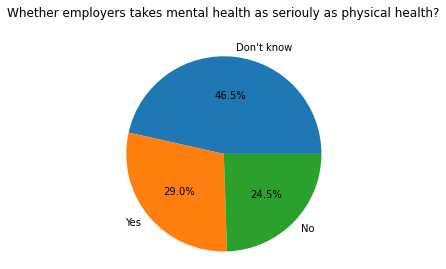

In [48]:
result.plot.pie(autopct="%.1f%%")
plt.ylabel('')
plt.axis('equal')
plt.title("Whether employers takes mental health as seriouly as physical health?", y=1.1)
plt.show()

To find the reason behind this huge percent of uncertanity among the employees we will see that how many people know the options an employer provides for mental health issues

In [49]:
careoptions = data_tech['care_options'].value_counts()
careoptions

No          408
Yes         350
Not sure    255
Name: care_options, dtype: int64

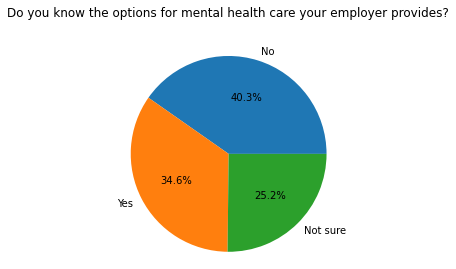

In [50]:
careoptions.plot.pie(autopct="%.1f%%")
plt.ylabel('')
plt.axis('equal')
plt.title("Do you know the options for mental health care your employer provides?", y=1.1)
plt.show()

The reason why so many people said Don't Know when they were asked whether an employer treated mental health issues as seriouly as physical health issues was because about 40.3 percent of people did not know about the options for mental health care their employer provided and 25.2 percent were not sure.

**Conclusion:** At the end the conclusion we can draw by our exploratory data analysis is that companies and employees do differenciate between the way they deal with mental and physical health issues. We saw that more people did not feel comfartable talking about thier mental health issues as compared to physical health issues during an interview, we also saw that talking to employer about mental health issues had a higher percentage of negative consequences as compared to discussing about physical health issues. And the reason why so many people did not know whether their employer took mental health as seriously as physical health was that majority of the people were unaware about whether their employer provided them with mental health care or not. This shows the lack of awareness amongst employees and seriousness by the employer towards mental health. By looking at the conclusion of these three subquestions we can conclude that companies and employees do differenciate between the way they deal with mental and physical health issues.

## Do mental health issues affect productivity?

In response to a question about how frequently poor mental health conditions affect the work of tech employees, this is what the employees said:

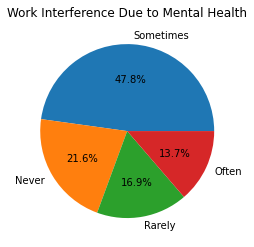

In [51]:
ax = data_tech['work_interfere'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%")
plt.title('Work Interference Due to Mental Health')
plt.ylabel('')
plt.show()

Most of the employees responded that sometimes they do feel that mental health issues interfere with their work. Often and Sometimes add up to around 60% whereas Never and Rarely add up to around 40%

#### Lets make a gender-wise comparison

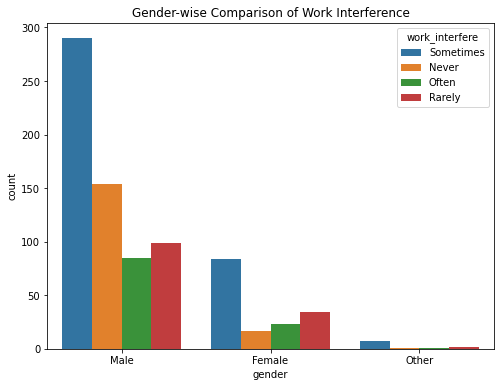

In [52]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'gender',ax=ax,hue= 'work_interfere')
plt.title("Gender-wise Comparison of Work Interference")
plt.show()

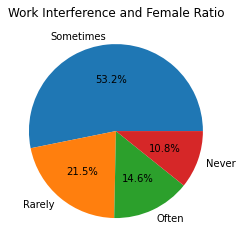

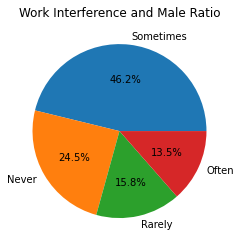

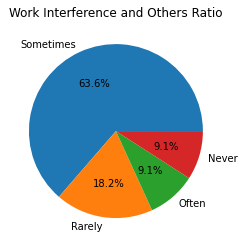

In [53]:
Label = ['Work Interference and Female Ratio', 'Work Interference and Male Ratio', 'Work Interference and Others Ratio']
List = ['Female', 'Male', 'Other']

for inter in range(0,3):

    data = data_tech[(data_tech['gender'] == List[inter])]['work_interfere'].value_counts()
    data.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])

    plt.title(Label[inter])
    plt.ylabel('')

    plt.show()

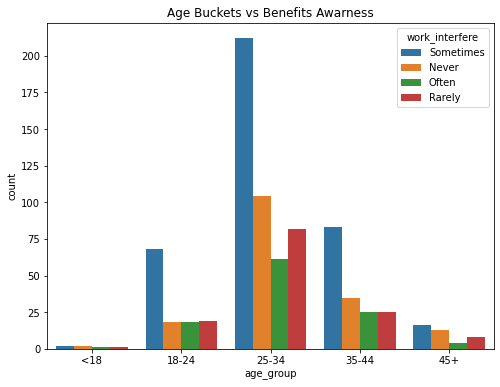

In [54]:
data_tech['age_group'] = pd.cut(data_tech['age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'age_group',hue= 'work_interfere',ax=ax)
plt.title('Age Buckets vs Benefits Awarness')
plt.show()

#### 'Sometimes' dominates regardless we're grouping by Age or Gender. Therefore, age and gender does not have an overall impact on the way mental health issues interferes with the work of employees

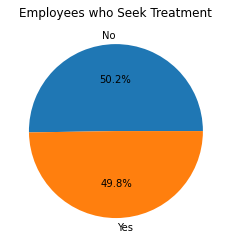

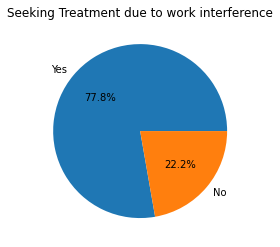

In [55]:
data = data_tech[(data_tech['work_interfere'] == 'Sometimes') | (data_tech['work_interfere'] == 'Often')]['treatment'].value_counts()

data_two = data_tech['treatment'].value_counts()
data_two.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Employees who Seek Treatment')
plt.ylabel('')
plt.show()

data.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Seeking Treatment due to work interference')
plt.ylabel('')
plt.show()

This is an interesting result! Initially, 49.8% of people sought treatment for mental health issues. However, when it interfered with their work, the % went up to 77.8% forming a majority.

## How open are tech employees about their mental health?

#### Visualizing ratio of those who would bring up mental health with potential employers

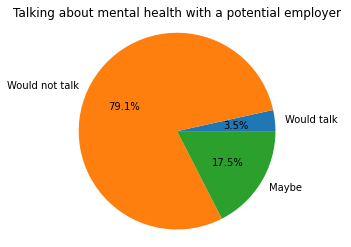

No       801
Maybe    177
Yes       35
Name: mental_health_interview, dtype: int64


In [56]:
# we have kept only tech employees in the data cleaning part so we explore the relevant fields
# columns we can use : mentalhealthinterview, supervisor, coworkers
Yes = data_tech['mental_health_interview'].value_counts()[2]
No = data_tech['mental_health_interview'].value_counts()[0]
Maybe = data_tech['mental_health_interview'].value_counts()[1]
List = [Yes, No, Maybe]
Labels = ['Would talk', 'Would not talk', 'Maybe']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Talking about mental health with a potential employer')
plt.axis('equal')
plt.show()
print(data_tech['mental_health_interview'].value_counts())

#### Visualizing ratio of those who would bring up mental health with supervisors

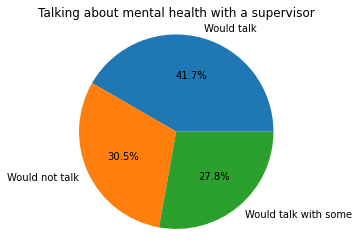

Yes             422
No              309
Some of them    282
Name: supervisor, dtype: int64


In [57]:
Yes = data_tech['supervisor'].value_counts()[0]
No = data_tech['supervisor'].value_counts()[1]
Some = data_tech['supervisor'].value_counts()[2]
List = [Yes, No, Some]
Labels = ['Would talk', 'Would not talk', 'Would talk with some']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Talking about mental health with a supervisor')
plt.axis('equal')
plt.show()
print(data_tech['supervisor'].value_counts())

#### Visualizing ratio of those who would bring up mental health with Coworkers

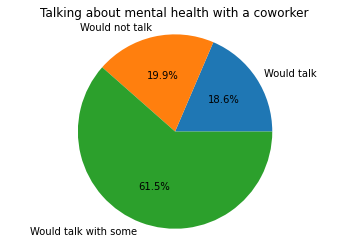

Some of them    623
No              202
Yes             188
Name: coworkers, dtype: int64


In [58]:
data_tech['coworkers'].value_counts()
Yes = data_tech['coworkers'].value_counts()[2]
No = data_tech['coworkers'].value_counts()[1]
Some = data_tech['coworkers'].value_counts()[0]
List = [Yes, No, Some]
Labels = ['Would talk', 'Would not talk', 'Would talk with some']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Talking about mental health with a coworker')
plt.axis('equal')
plt.show()
print(data_tech['coworkers'].value_counts())

#### Could discussing mental health with your employer have a negative consequence?

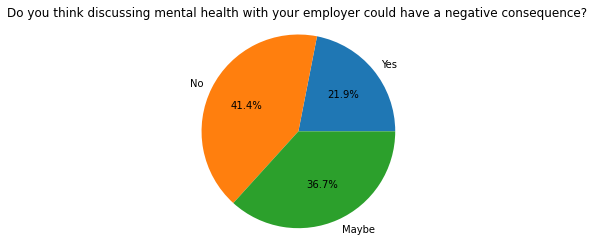

In [59]:
data_tech['mental_health_consequence'].value_counts()
Yes = data_tech['mental_health_consequence'].value_counts()[2]
No = data_tech['mental_health_consequence'].value_counts()[0]
Maybe = data_tech['mental_health_consequence'].value_counts()[1]
List = [Yes, No, Maybe]
Labels = ['Yes', 'No', 'Maybe']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Do you think discussing mental health with your employer could have a negative consequence?')
plt.axis('equal')
plt.show()

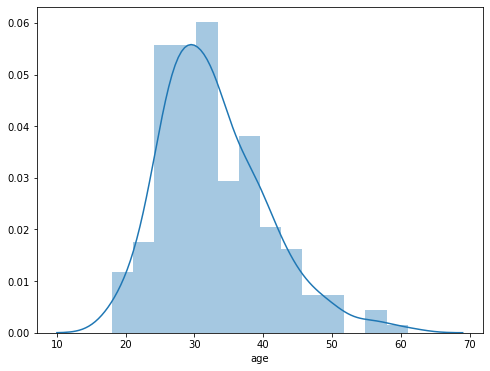

In [60]:
# make an age distribution plot 
df_new = data_tech[data_tech['mental_health_consequence']=='Yes']
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df_new["age"],ax=ax)

#### Observed negative consequences for coworkers with mental health conditions in your workplace?

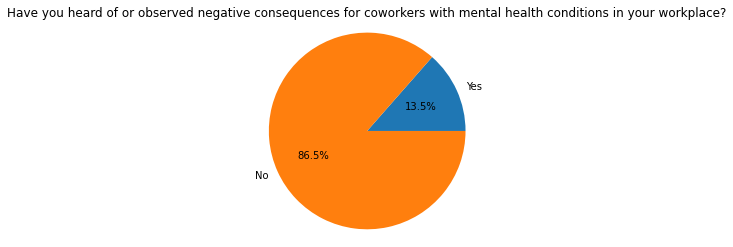

In [61]:
data_tech['obs_consequence'].value_counts()
Yes = data_tech['obs_consequence'].value_counts()[1]
No = data_tech['obs_consequence'].value_counts()[0]

List = [Yes, No]
Labels = ['Yes', 'No']
plt.pie(List, labels = Labels, autopct='%1.1f%%')
plt.title('Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?')
plt.axis('equal')
plt.show()

### How do tech-companies accomodate its employees with mental health issues?

#### Benefits Provided by Company/Employer

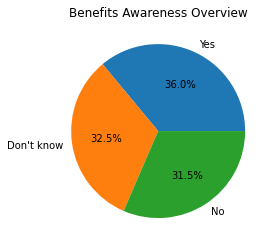

In [62]:
ax = data_tech['benefits'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Benefits Awareness Overview')
plt.ylabel('')
plt.show()

Proportions of Employees responding Yes, No, and Dont Know are roughly similar. Let's break them down further

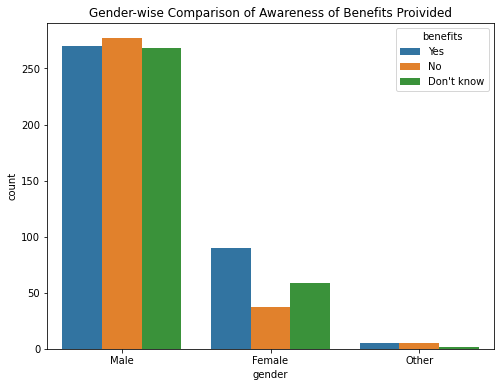

In [63]:
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'gender',hue= 'benefits',ax=ax)
plt.title("Gender-wise Comparison of Awareness of Benefits Proivided")
plt.show()

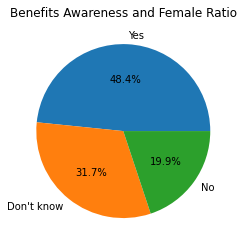

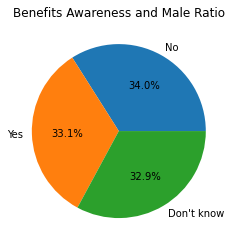

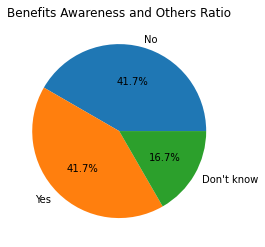

In [64]:
Label = ['Benefits Awareness and Female Ratio', 'Benefits Awareness and Male Ratio', 'Benefits Awareness and Others Ratio']
List = ['Female', 'Male', 'Other']
#fig.tight_layout(pad=4.5)
for val in range(0,3):
    data = data_tech[(data_tech['gender'] == List[val])]['benefits'].value_counts()
    data.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
    plt.title(Label[val])
    plt.ylabel('')
    plt.show()
    

As we can observe, percentage of the female and Others population who responded with a 'Yes' when asked if Benefits were provided by the employer is greater as compared to that of male employees. It could be possible that Female employees and employees of other gender have been provided greater mental health benefits

#### Let's Also Have a look of Benefits Response with respect to age

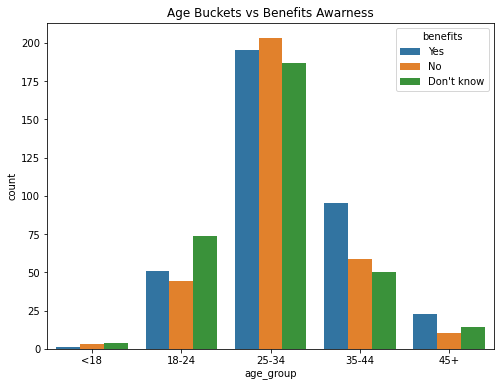

In [65]:
data_tech['age_group'] = pd.cut(data_tech['age'].dropna(),
                         [0,18,25,35,45,99],
                         labels=['<18','18-24','25-34','35-44','45+'])

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'age_group',hue= 'benefits',ax=ax)
plt.title('Age Buckets vs Benefits Awarness')
plt.show()

This shows an interesting trend. Young employees mostly responded as 'Dont Know' to the question. Employees in their peak age (25-34) moslty responded with 'No'. But as their seniority grew, not only the number of 'Don't Know' responses dropped but the proportion of 'Yes' also increased

### Care Options provided by Company/Employer

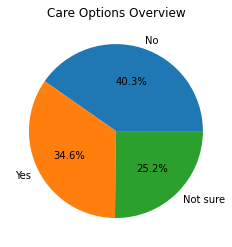

In [66]:
ax = data_tech['care_options'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Care Options Overview')
plt.ylabel('')
plt.show()

#### We find a small proportion of Employees who are aware of the Care options provided; most responded with 'No' and some with 'Not sure'

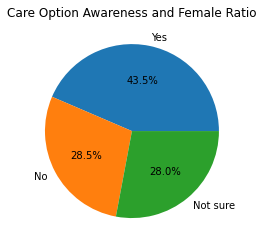

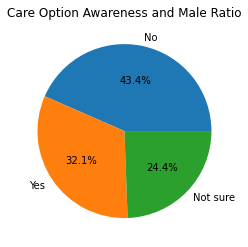

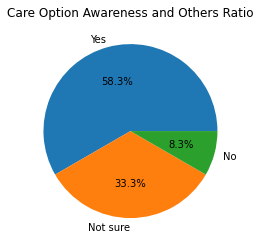

In [67]:
Label = ['Care Option Awareness and Female Ratio', 'Care Option Awareness and Male Ratio', 'Care Option Awareness and Others Ratio']
List = ['Female', 'Male', 'Other']
fig.tight_layout(pad=4.5)
for val in range(0,3):
    data = data_tech[(data_tech['gender'] == List[val])]['care_options'].value_counts()
    data.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
    plt.title(Label[val])
    plt.ylabel('')
    plt.show()

Similar Results! Female and employees of Other gender are more aware of the care options provided by the company/employer as compared to Male Employees

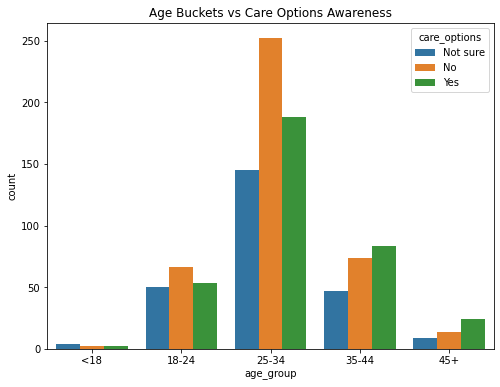

In [68]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'age_group',hue= 'care_options',ax=ax)
plt.title('Age Buckets vs Care Options Awareness')
plt.show()

Once again, we observe a similar trend to what we did with respect to Benefits. Senior employees (35+ age) seems to have more knowledge of the care options provided by the company as compared to young employees (below 35 in age)

### Mental Health as part of Employee Wellness Program

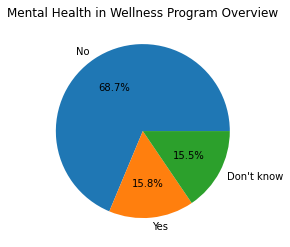

In [69]:
ax = data_tech['wellness_program'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Mental Health in Wellness Program Overview')
plt.ylabel('')
plt.show()

Clearly, a large majority of companies/employers either do not discuss mental health as part of the Wellness Program or employees do not know about it


#### If we consider only those who responded 'Yes' to the above question:

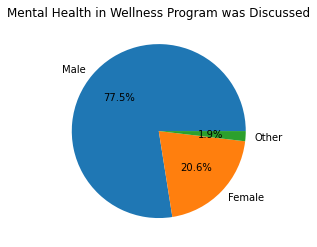

Male      124
Female     33
Other       3
Name: gender, dtype: int64


In [70]:
data = data_tech[data_tech['wellness_program'] == "Yes"]["gender"].value_counts()
data.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Mental Health in Wellness Program was Discussed')
plt.ylabel('')
plt.show()
print(data)

We see Male dominating. However, we can also observe that this ratio is similar to the gender ratio in Tech-firms (shown below)

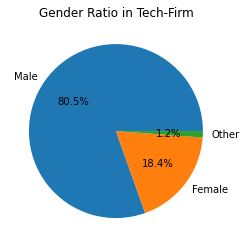

Male      815
Female    186
Other      12
Name: gender, dtype: int64


In [71]:
data_two = data_tech['gender'].value_counts()
data_two.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Gender Ratio in Tech-Firm')
plt.ylabel('')
plt.show()
print(data_two)

Therefore, the high statistics of Male can simply be due to the fact that generally the Male to Female ratio in tech-firms is high

### Resources to Seek Help

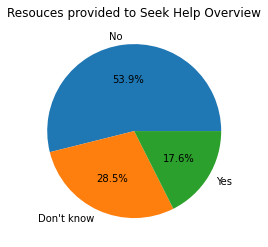

In [72]:
ax = data_tech['seek_help'].value_counts()
ax.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Resouces provided to Seek Help Overview')
plt.ylabel('')
plt.show()

Once again, employees who responded with 'Yes' are the fewest in number. Most said that their employer does not provide resources to seek help.

#### Let's use the treatment (whether an employee sought treatment for mental health) attribute here and see what outcomes we get.

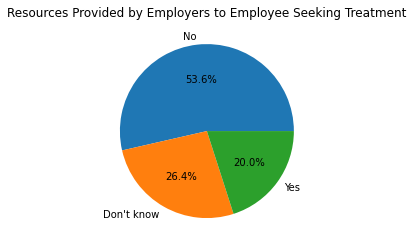

In [73]:
data = data_tech[data_tech['treatment'] == 'Yes']['seek_help'].value_counts()

data.plot.pie(subplots=True,autopct="%.1f%%", figsize=[6,4])
plt.title('Resources Provided by Employers to Employee Seeking Treatment')
plt.ylabel('')
plt.show()

As we notice, this is roughly the same result that we got before. Regardless of an employee seeking or not seeking treatment, the employer/company responds in the same manner when it comes to providing resources to learn more about mental health

### Anonymity Protection

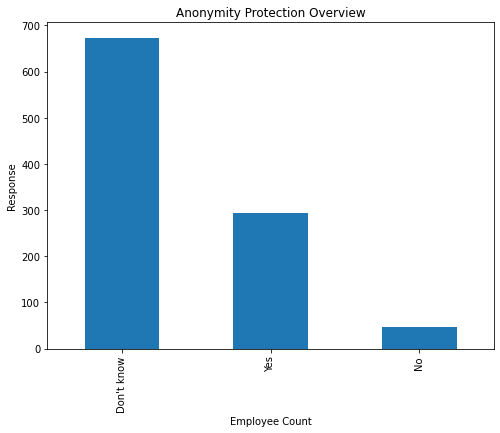

In [74]:

plt.title("Anonymity Protection Overview")
ax = data_tech['anonymity'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Employee Count")
plt.ylabel("Response")
plt.show()


This is an interesting result! Majority of the employees answered this with Don't Know which can also show that most of them did not take advantage of mental health or substance abuse treatment resources. It could also show that employees might not be comfortable with pursuing substance abuse treatment.

#### Let's have a look at employees who responded with Yes/No (who possibly took some kind of treatment)

#### We also conduct a gender wise comparison¶

Yes    294
No      46
Name: anonymity, dtype: int64


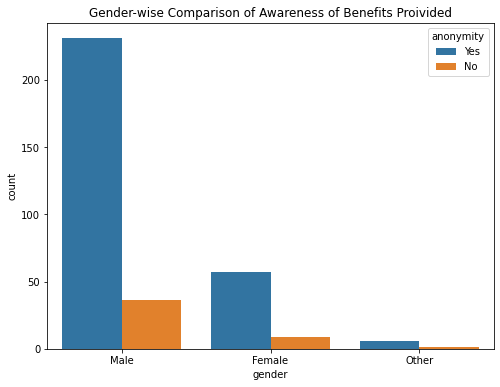

In [75]:
data = data_tech[(data_tech['anonymity'] == 'Yes') | (data_tech['anonymity'] == 'No')]['anonymity'].value_counts()
print(data)

data2 = data_tech[(data_tech['anonymity'] == 'Yes') | (data_tech['anonymity'] == 'No')]
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data2,x = 'gender',hue= 'anonymity',ax=ax)
plt.title("Gender-wise Comparison of Awareness of Benefits Proivided")
plt.show()

#### For each gender, Anonymity being protected was generally observed

### Leave

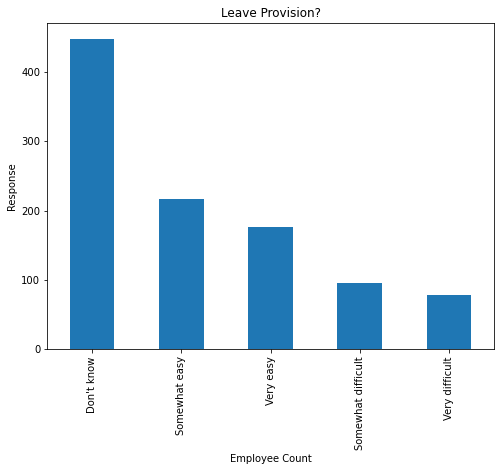

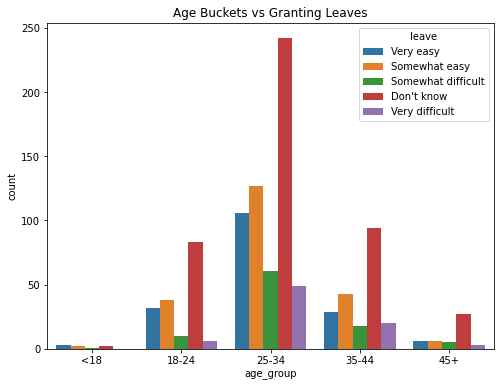

In [76]:
plt.title("Leave Provision?")
ax = data_tech['leave'].value_counts()
ax.plot.bar(figsize=(8,6))
plt.xlabel("Employee Count")
plt.ylabel("Response")
plt.show()

fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'age_group',hue= 'leave',ax=ax)
plt.title('Age Buckets vs Granting Leaves')
plt.show()


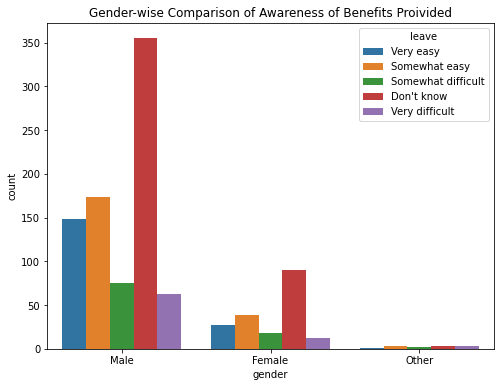

In [77]:
leave_gen = data_tech.groupby(['gender'])['leave']
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=data_tech,x = 'gender',hue= 'leave',ax=ax)
plt.title("Gender-wise Comparison of Awareness of Benefits Proivided")
plt.show()

The highest results were for the option 'Dont Know' which can indicate that the employee did not ask for a leave for mental health issues and does not know about the company's response. Apart from that, we see across all ages and genders, it was 'very easy' to 'somewhat easy' for employees to get leave due to mental health issues

## Conclusions

This marks an end to our exploratory data analysis. Throughout the process, we looked into the prevalence of mental health issues in tech companies and the response of both the employees and employers by discussing each goal identified at the beginning separately. We then visualized the responses obtained from the survey and identified factors that could influence them. Finally, we also formed insightful inferences that helped offer possible reasonings to the responses that were obtained.